#### Pharma Sales Data Analysis

The dataset is constructed from the initial dataset composed of 600,000 transactional data collected over 6 years (period 2014-2019), indicating date and time of sale, brand of pharmaceutical medicine and quantity sold, exported from each pharmacy's system . The selected group of drugs from the dataset (57 drugs) is classified into the following categories of the Anatomical Therapeutic Chemical (ATC) classification system:

M01AB - Non-steroidal anti-inflammatory and anti-rheumatic products, acetic acid derivatives and related substances

M01AE - Anti-inflammatory and anti-rheumatic products, non-steroidal, derived from propionic acid

N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives

N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides

N05B - ​​Psycholeptic medicines, anxiolytic medicines

N05C - Psycholeptic, hypnotic and sedative medicines

R03 - Medications for obstructive airway diseases

R06 – Antihistamines for systemic use

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(42)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Objective:

1.Which classes of medicines showed an increase or decrease in demand between 2014 and 2019?

2.Is there a seasonal pattern in the sales of certain drug categories?

3.Forecasting sales trend for the highest selling drug 

In [2]:
pharma_sales_data = pd.read_csv('C:/SUPRIYA/Data Science/Projects/Pharma sales data/salesmonthly.csv')
pharma_sales_data.head()

pharma_sales_data.dtypes

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object

In [3]:
#The date column has type 'object', so it must be converted to type datetime64
pharma_sales_data['datum'] = pd.to_datetime(pharma_sales_data['datum'], format='%Y-%m-%d')
pharma_sales_data.dtypes

datum    datetime64[ns]
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
dtype: object

In [4]:
pharma_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.1 KB


In [5]:
pharma_sales_data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [6]:
pharma_sales_data.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [7]:
dates_expected = pd.date_range(start='2014-01-01', end='2019-12-31', freq='M')

dates_in_dataframe = pd.to_datetime(pharma_sales_data['datum'].dt.strftime('%Y-%m-%d')).unique()

for year in range(2014, 2020):
    missing_dates = [date for date in dates_expected if date.year == year and date not in dates_in_dataframe]
    if missing_dates:
        print(f"{year}: Missing date - {missing_dates}")
    else:
        print(f"{year}: No missing dates ")

2014: No missing dates 
2015: No missing dates 
2016: No missing dates 
2017: No missing dates 
2018: No missing dates 
2019: Missing date - [Timestamp('2019-11-30 00:00:00'), Timestamp('2019-12-31 00:00:00')]


We can see that we have missing dates only for 2019. Let's then input these missing values ​​so that our analysis is more complete and comparable between the different years.

In [8]:
df_1 = deepcopy(pharma_sales_data)

In [9]:
import pandas as pd

# Adding rows for '2019-11-30' and '2019-12-31'
new_rows = pd.DataFrame({'datum': [pd.to_datetime('2019-11-30'), pd.to_datetime('2019-12-31')]})
df_1 = pd.concat([df_1, new_rows], ignore_index=True)

# Loop to populate new rows with the median of the previous months for each drug category
for category in df_1.columns.difference(['datum']):
    # Calculating the median for each category through October 2019
    median = df_1.loc[df_1['datum'] < '2019-11-01', category].median()

    # Populating new rows with the calculated median
    df_1.loc[df_1['datum'] == '2019-11-30', category] = median
    df_1.loc[df_1['datum'] == '2019-12-31', category] = median

# Displaying the resulting DataFrame
print(df_1.tail(2))


        datum    M01AB   M01AE    N02BA     N02BE   N05B  N05C    R03   R06
70 2019-11-30  154.635  114.84  117.225  865.8245  250.3  18.0  160.0  74.1
71 2019-12-31  154.635  114.84  117.225  865.8245  250.3  18.0  160.0  74.1


In [10]:
pharma_sales_data = deepcopy(df_1)

### Which classes of medicines showed an increase or decrease in demand between 2014 and 2019

In [11]:
df_1.loc[:,'datum'] = df_1.datum.dt.year
df_1 = df_1.groupby('datum').sum() #Calculating the amount of sales for each class of medicine in each year

In [12]:
df_1

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014,1510.77,1333.594,1683.279,10094.555,4355.0,303.0,1277.00,828.30
2015,1905.62,1496.603,1608.630,11997.350,2965.0,159.0,1776.25,983.03
2016,2125.06,1604.441,1664.800,13435.830,3278.5,207.0,2137.00,1065.07
2017,1653.79,1214.485,1091.150,7674.919,2078.0,142.0,1732.00,919.61
2018,1786.93,1389.656,1123.800,11263.675,3266.2,242.0,2765.00,1196.80
2019,1826.54,1346.901,1114.250,9743.265,2906.2,232.0,2370.00,1221.77


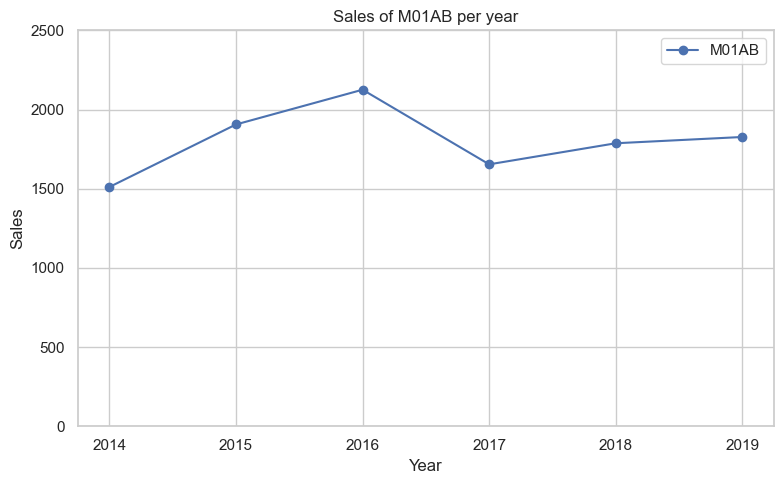

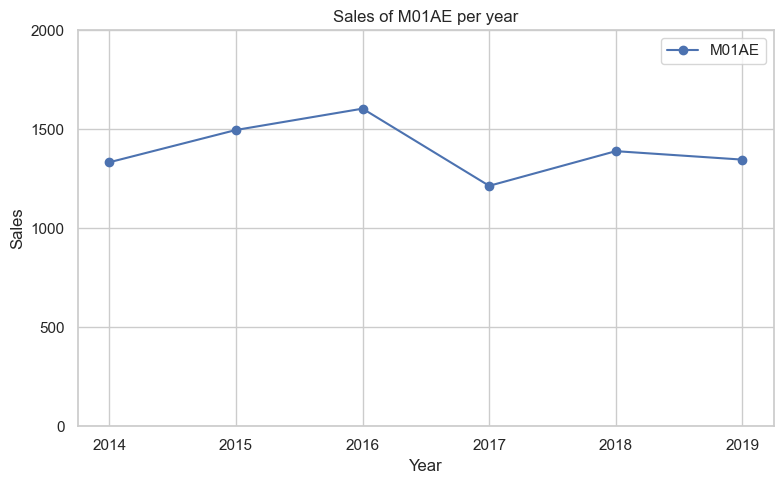

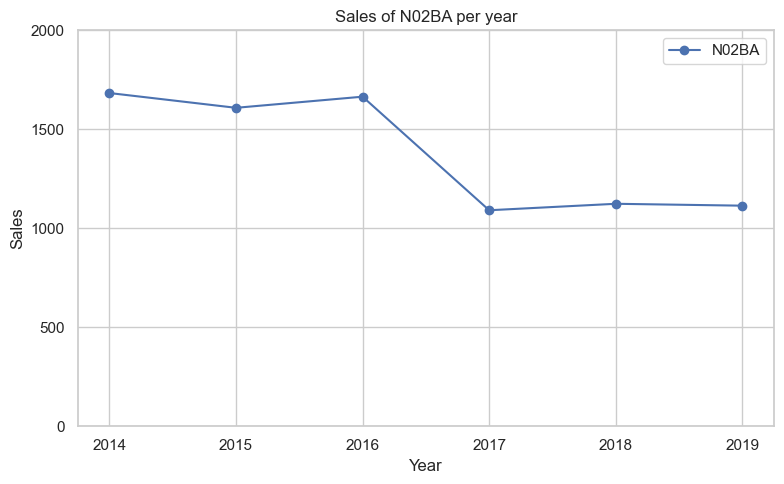

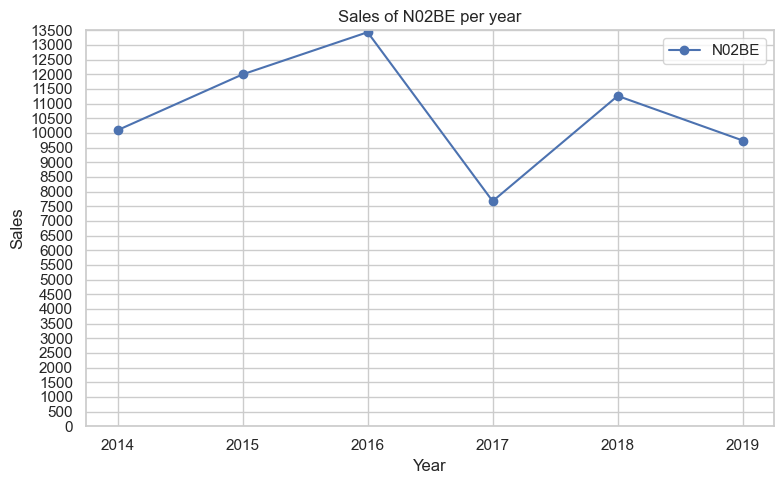

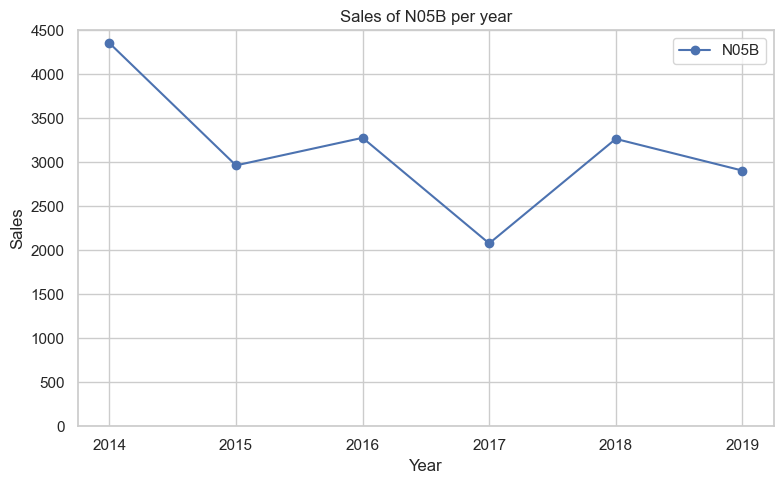

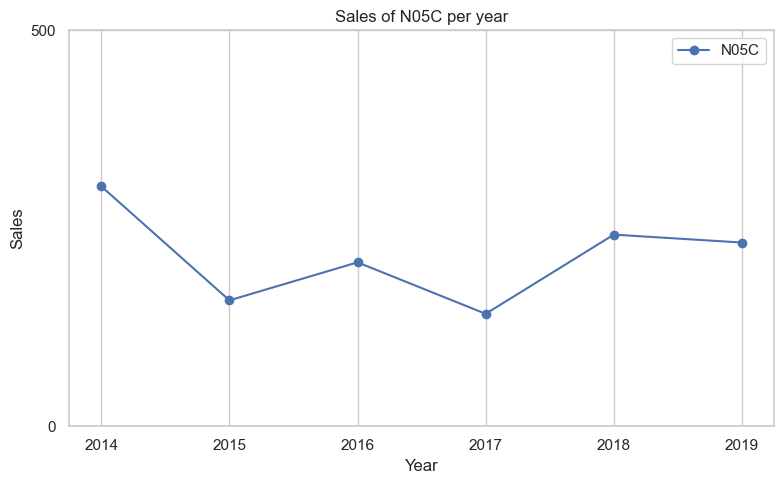

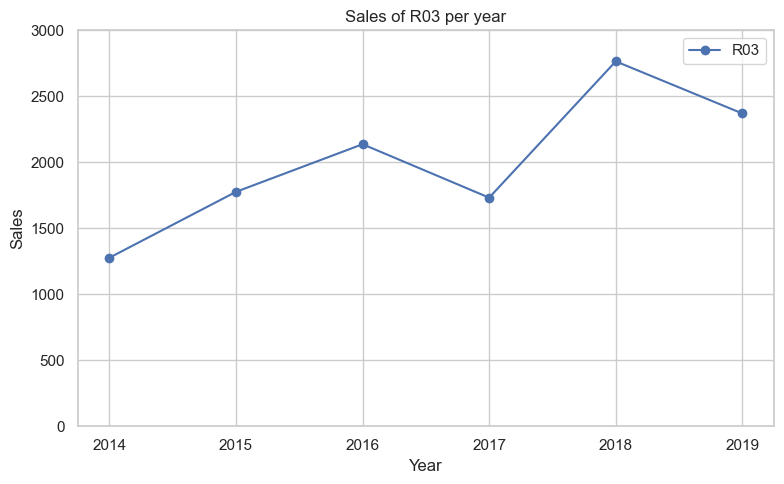

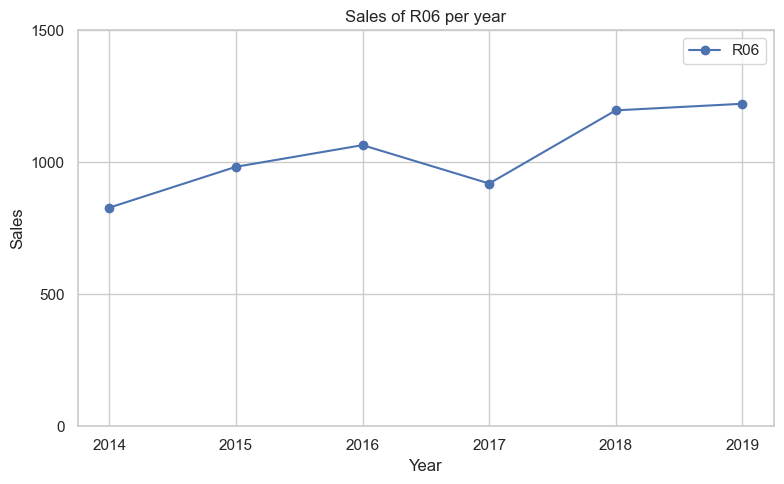

In [13]:
sns.set(style="whitegrid")

for column in df_1.columns:
    plt.figure(figsize=(8, 5))

    # Find the maximum value across all columns to scale the graphs
    max_value = df_1[column].max()

    # Round up to the nearest multiple of 200
    max_value = int((max_value + 499) // 500) * 500

    plt.plot(df_1.index, df_1[column], marker='o', linestyle='-', label=column)

    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.title(f'Sales of {column} per year')
    plt.legend()
    plt.grid(True)
    
    plt.yticks(range(0, max_value + 1, 500)) # Set intervals of 200 on the y-axis
    plt.ylim(0, max_value) # Adjust upper limit of the y-axis
    plt.tight_layout() # Adjust layout to avoid overlaps
    plt.show()

In [14]:
print(df_1.columns)

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], dtype='object')


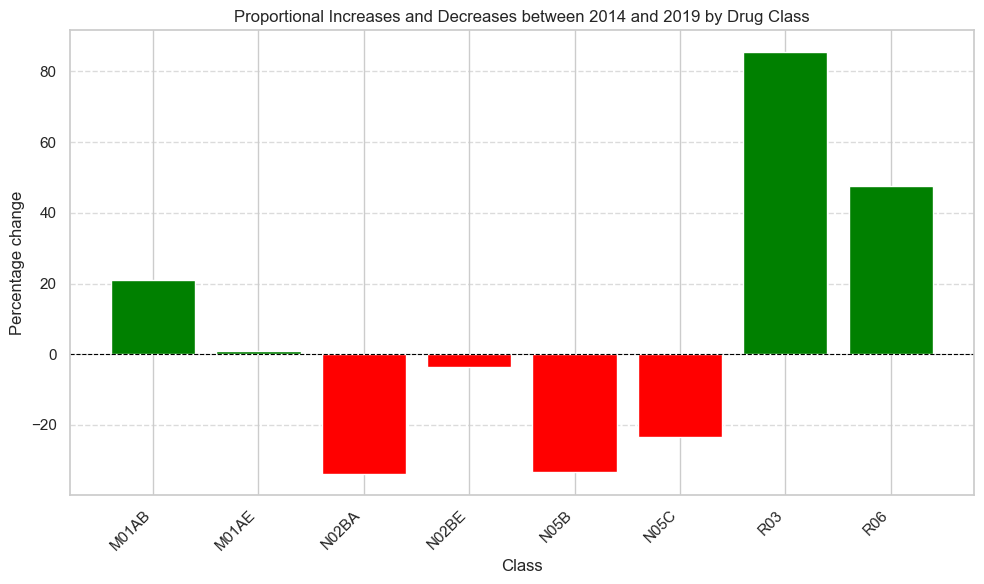

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Delta_DF to store the results of the percentage change
delta_df = pd.DataFrame(columns=['Class', 'Percentage change'])

# Loop through the columns of DF_1 (considering that DF_1 has lines identifiable by 2014 and 2019)
for column in df_1.columns:
   # Replace '2014' and '2019' for the corresponding lines
    inicial = df_1.loc[2014, column]  # Make sure 2014 and 2019 are valid indices or replace them
    final = df_1.loc[2019, column]   # By indices or conditions that make sense for your dataframe
    
    # Calculates the percentage change
    change_percentage = ((final - inicial) / inicial) * 100
    
    # Adds results to Dataframe Delta_DF using pd.concat ()
    new_row = pd.DataFrame({'Class': [column], 'Percentage change': [change_percentage]})
    delta_df = pd.concat([delta_df, new_row], ignore_index=True)

# Plot a bar chart showing increases and decreases for each class of medicine
plt.figure(figsize=(10, 6))
plt.bar(delta_df['Class'], delta_df['Percentage change'], 
        color=['green' if x >= 0 else 'red' for x in delta_df['Percentage change']])
plt.xlabel('Class')
plt.ylabel('Percentage change')
plt.title('Proportional Increases and Decreases between 2014 and 2019 by Drug Class')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos no eixo x para melhor legibilidade
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displays the bar chart
plt.tight_layout()
plt.show()

Of all classes of drugs, 4 of them showed increased sales between 2014 and 2019. Medicines for obstructive diseases (R03) showed about 85% increase, while antihistamines of systemic use (R06) presented an increase of about 45%. Anti-inflammatory and anti-reheatic, non-steroids, derived from acetic acid and related substances showed an increase of about 20%. The M01A3 class showed an increase of about 1%.

There are some interesting points that can be highlighted when analyzing these graphs
The M01AB class medicines had a sharp growth in sales between 2014 and 2016, where sales began to decline.

Although a small recovery took place between 2017 and 2018, the medicines of this class, at the last point of analysis, had a slightly higher performance in 2019
N02BA class sales sales have decreased since 2014, having a more pronounced decrease between 2016 and 2017 and reaching its lowest level in 2019.

The R03 class drugs, used to treat obstructive airway diseases, had a great growth between 2014 and 2018, reaching their highest level this year

Nevertheless, there was a sharp drop in sales between 2018 and 2019; The presence of this information also allows a decision making more aligned with the reality of the number of sales

What is the sales trend for each drug category over time?

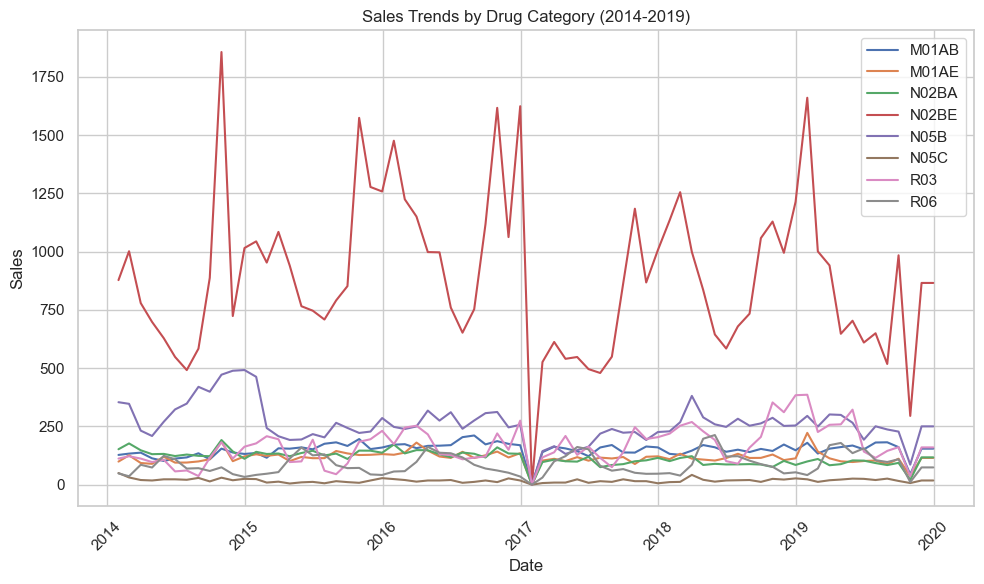

In [16]:
# Plot sales trends over time for all drug categories
plt.figure(figsize=(10,6))
for column in pharma_sales_data.columns.difference(['datum']):
    plt.plot(pharma_sales_data['datum'], pharma_sales_data[column], label=column)

plt.title('Sales Trends by Drug Category (2014-2019)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The line plot shows the sales trends for different drug categories from 2014 to 2019. Here are some key insights:

N02BE (Other analgesics and antipyretics) stands out with significantly higher sales compared to the other categories. There are noticeable spikes in 2016 and 2017, which suggests demand surges, possibly driven by specific health events, seasonal illnesses, or promotions.

Relatively Stable Trends: Categories such as M01AB, M01AE, N02BA, N05B, N05C, R03, and R06 have more stable sales with less volatility over time. These drug categories appear to have consistent demand without major peaks or troughs, which may indicate steady usage patterns.

Sales Drop in Late 2016/2017: There is a notable drop in sales across almost all categories in late 2016/early 2017. This drop might indicate a data issue, a supply chain disruption, or a significant external factor affecting pharmaceutical sales during this period.

Recovery in 2018: Many categories show a slight upward trend in sales from 2018 onwards, suggesting recovery or growing demand.

## Is there a seasonal pattern in the sales of certain drug categories?

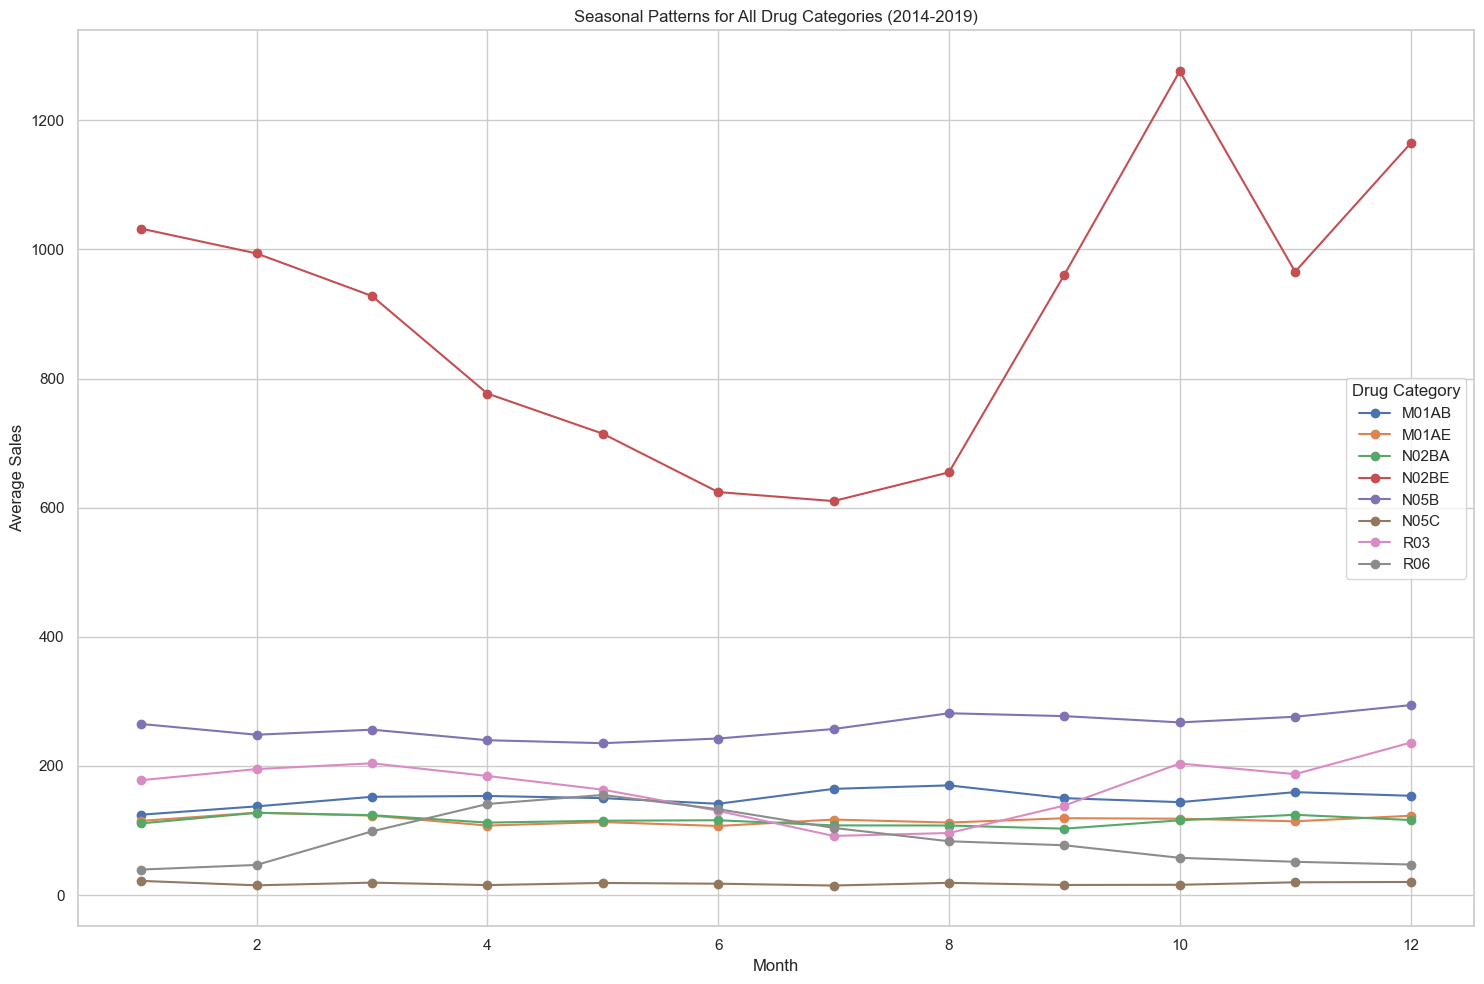

In [18]:
import matplotlib.pyplot as plt

# Add 'Month' and 'Year' columns if not already present
pharma_sales_data['Month'] = pharma_sales_data['datum'].dt.month
pharma_sales_data['Year'] = pharma_sales_data['datum'].dt.year

# Calculate average monthly sales for each drug category
avg_monthly_sales = pharma_sales_data.groupby('Month').mean()

# Create subplots for each drug category to detect seasonal patterns
plt.figure(figsize=(15, 10))  # Adjust figure size based on the number of subplots

# Loop through each column and plot the seasonal pattern
for column in pharma_sales_data.columns.difference(['datum', 'Month', 'Year']):
    plt.plot(avg_monthly_sales.index, avg_monthly_sales[column], marker='o', label=column)

# Add titles, labels, and legends
plt.title('Seasonal Patterns for All Drug Categories (2014-2019)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend(title="Drug Category")
plt.grid(True)
plt.tight_layout()
plt.show()


The graph shows a clear seasonal pattern for N02BE (analgesics and antipyretics), with higher sales from October to December and a peak in November, likely due to cold, flu, and holiday season demand. Other categories like M01AB, M01AE, N02BA, N05B, N05C, R03, and R06 have relatively stable sales, suggesting consistent year-round use. Minor fluctuations in R03 and R06 may reflect seasonal respiratory and allergy trends, but are less pronounced than N02BE.

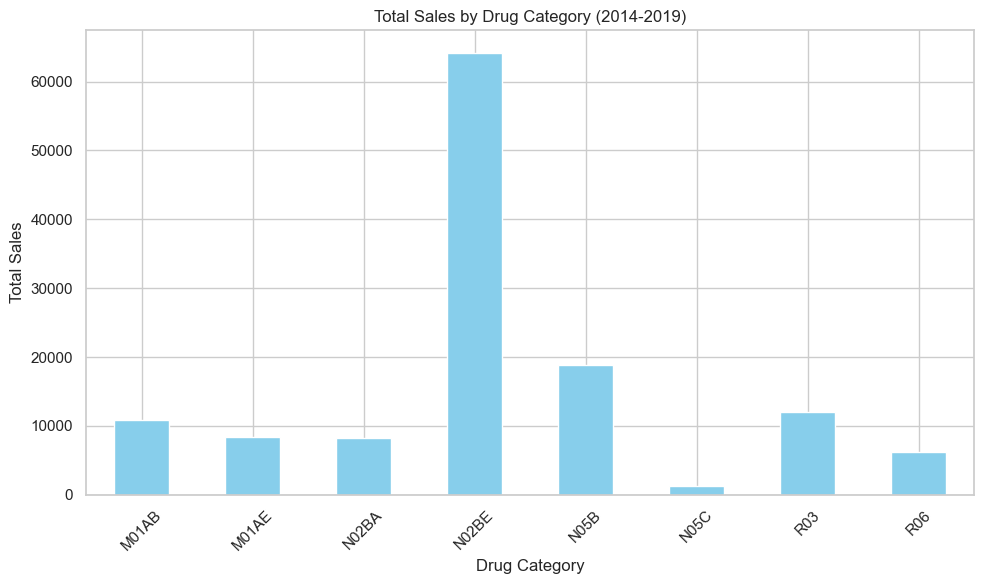

In [19]:
# Calculate total sales for each drug category (excluding 'Month' and 'Year')
total_sales_per_category = pharma_sales_data.drop(['datum', 'Month', 'Year'], axis=1).sum()

# Plot total sales for each drug category
plt.figure(figsize=(10,6))
total_sales_per_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Drug Category (2014-2019)')
plt.xlabel('Drug Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Forecasting sales trend for the highest selling drug N02BE

In [21]:
df_2 = deepcopy(pharma_sales_data)

In [22]:
df_2

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Month,Year
0,2014-01-31,127.690,99.090,152.100,878.0300,354.0,50.0,112.0,48.20,1,2014
1,2014-02-28,133.320,126.050,177.000,1001.9000,347.0,31.0,122.0,36.20,2,2014
2,2014-03-31,137.440,92.950,147.655,779.2750,232.0,20.0,112.0,85.40,3,2014
3,2014-04-30,113.100,89.475,130.900,698.5000,209.0,18.0,97.0,73.70,4,2014
4,2014-05-31,101.790,119.933,132.100,628.7800,270.0,23.0,107.0,123.70,5,2014
...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-31,181.910,88.269,84.200,518.1000,237.0,26.0,145.0,97.30,8,2019
68,2019-09-30,161.070,111.437,93.500,984.4800,227.8,16.0,161.0,109.10,9,2019
69,2019-10-31,44.370,37.300,20.650,295.1500,86.0,7.0,37.0,11.13,10,2019
70,2019-11-30,154.635,114.840,117.225,865.8245,250.3,18.0,160.0,74.10,11,2019


In [23]:
from statsmodels.tsa.stattools import adfuller

# List of columns
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Aplicando o teste ADF para cada coluna
for columns in columns:
    data = df_2[columns]

    # Aplicando o teste ADF
    result_adf = adfuller(data)
    
    print(f'Columns: {columns}')
    print('ADF Statistic:', result_adf[0])
    print('p-Value:', result_adf[1])
    print("\n")

Columns: M01AB
ADF Statistic: -6.4122753864375435
p-Value: 1.8780219933709184e-08


Columns: M01AE
ADF Statistic: -7.235247688634026
p-Value: 1.9472010453092865e-10


Columns: N02BA
ADF Statistic: -3.6219990431743057
p-Value: 0.005354116161100736


Columns: N02BE
ADF Statistic: -3.9230811052726766
p-Value: 0.001871398746161219


Columns: N05B
ADF Statistic: -3.59906563277518
p-Value: 0.005778915992522208


Columns: N05C
ADF Statistic: -7.021439842887562
p-Value: 6.527696034222064e-10


Columns: R03
ADF Statistic: -4.329029070691088
p-Value: 0.0003955118357123627


Columns: R06
ADF Statistic: -1.0392069544767046
p-Value: 0.7386973246320165




2014-01-31 00:00:00 2019-12-31 00:00:00


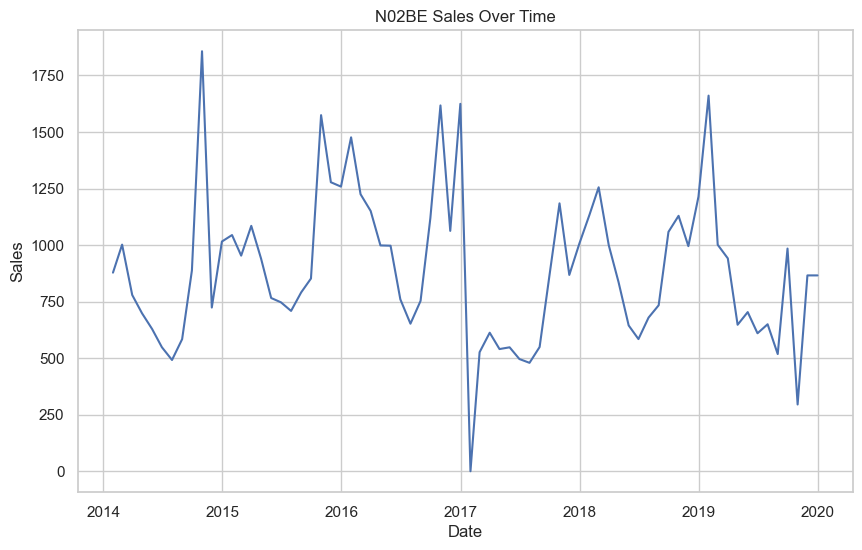

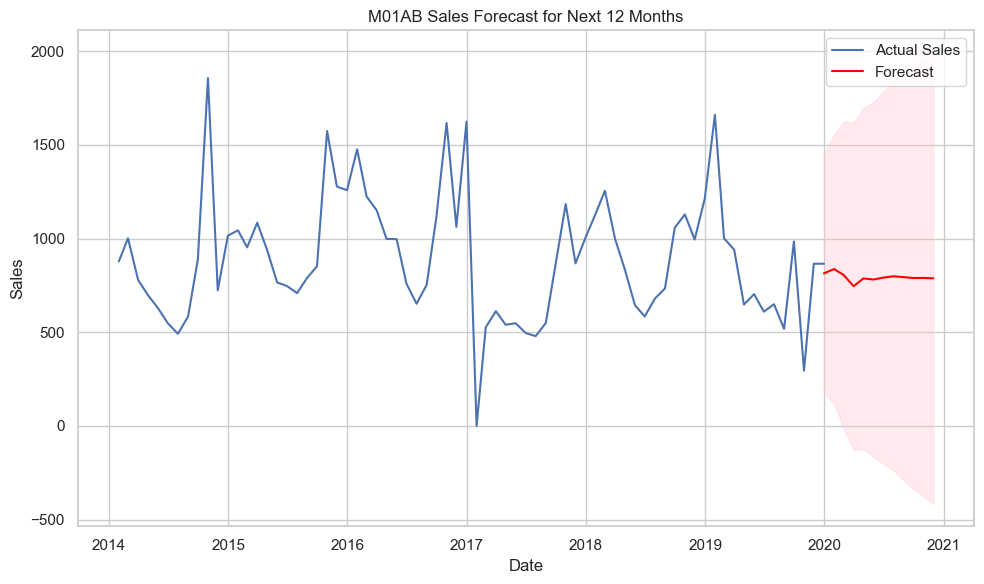

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Ensure the 'datum' column is in datetime format
df_2['datum'] = pd.to_datetime(df_2['datum'], errors='coerce')  # force any parsing issues to NaT

# Set 'datum' as the index for the DataFrame
df_2.set_index('datum', inplace=True)

# Check if any parsing errors resulted in NaT values
if df_2.index.isna().any():
    print("Warning: Some dates could not be parsed correctly. Check your data.")

# Check the date range in the index
print(df_2.index.min(), df_2.index.max())  # Make sure these are reasonable

# Select the sales data for M01AB
N02BE_sales = df_2['N02BE']

# Plot the time series to visualize
plt.figure(figsize=(10, 6))
plt.plot(N02BE_sales)
plt.title('N02BE Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Fit a SARIMAX model with ARIMA (p,d,q) parameters
model = SARIMAX(N02BE_sales, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12  # Forecast for 12 months
forecast_obj = model_fit.get_forecast(steps=forecast_steps)

# Get forecasted values and confidence intervals
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# Plot the forecast along with the confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(N02BE_sales.index, N02BE_sales, label='Actual Sales')
plt.plot(pd.date_range(N02BE_sales.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(N02BE_sales.index[-1], periods=forecast_steps, freq='M'), 
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('M01AB Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The forecast for M01AB sales over the next 12 months (in red) shows relatively stable sales with minimal growth. The confidence interval (shaded area) widens significantly, indicating higher uncertainty in predictions as time progresses. Past sales exhibit high volatility, complicating the forecast.